<h1 style="font-size: 3em; text-align: justify; text-decoration: underline;">From Jupyter with Love</h1>
<h1 style="font-size: 2.5em; text-align: justify;">or</h1>
<h1 style="font-size: 2.5em; text-align: justify; text-decoration: underline;">How I Learned to Stop Worrying and Love the Walrus</h1>

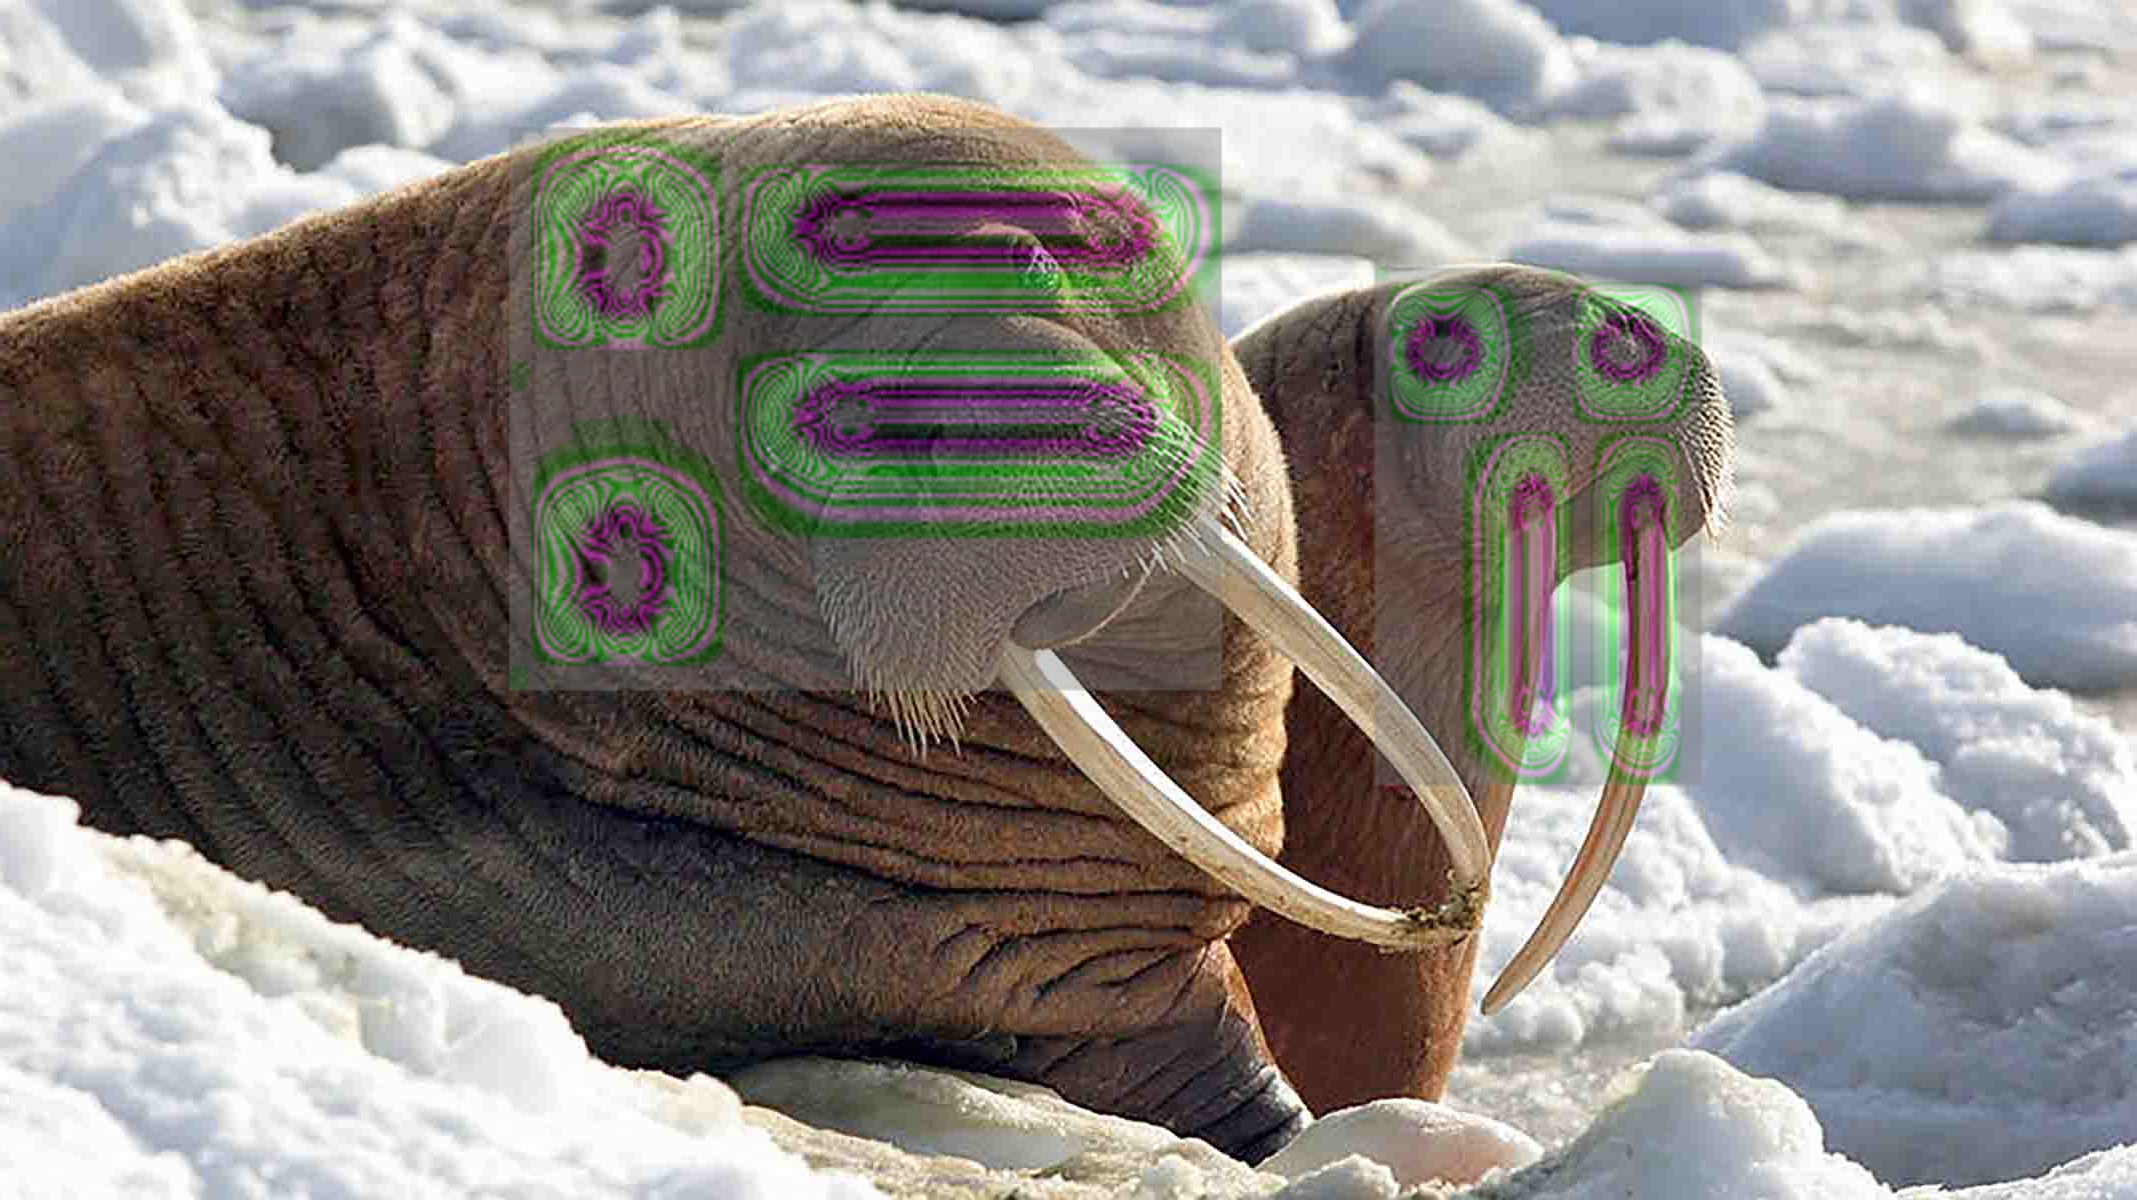

<hr style="height: 2px;">

<p style="font-size: 1.25em;">Let me preface this with a couple of caveats.</p>
    <ol style="font-size: 1.25em;">
        <li>I am by no means a Python expert, merely an enthusiastic practitioner.</li>
        <br>
        <li>The use-cases outlined in this article come from my experience in utilizing Python as a data analysis tool, specifically in a Jupyter Notebook environment on relatively small datasets, and as such may be memory-prohibitive in a different application.</li>
    </ol>

<hr style="height: 2px;">
<hr style="height: 2px;">

<p style="font-size: 1.25em;">The Assignment Expression operator, commonly referred to as "'The Walrus Operator" due to its 'tusks', was introduced in Python 3.8. Specifically, PEP 572 brought us this change. You can read about the intentions and justifications for the feature at https://peps.python.org/pep-0572/, and I encourage you do so. Nevertheless, the feature was met with some skepticism, even outright disgust, when it was introduced.</p>

<p style="font-size: 1.25em;">::TLDR::</p>
<p style="font-size: 1.25em;">When working in a Jupyter Notebook…</p>
<p style="font-size: 1.25em;">Working one's way through constructing the figures, even relatively efficiently, is a bit of a chore. If I can change:</p>

In [ ]:
'''
################
################
'''

<p style="font-size: 1.25em;">Into:</p>

In [ ]:
'''
###### READ IN CSVs ##############
df = (tmp := pd.read_csv('../in/highlightsNew.csv',
                         usecols=['Text',
                                  'Tag',
                                  'Tag - Group',
                                  'Note - Role',
                                  'Note - Industry',
                                  'Note - Participant ID'])
     ).drop(tmp.loc[tmp['Note - Participant ID'].str.contains('MKT'), :].index).rename({'Text': 'Evidence',
                                                                            'Tag - Group': 'Group',
                                                                            'Note - Role': 'Role',
                                                                            'Note - Industry': 'Industry',
                                                                            'Note - Participant ID': 'Participant'}, axis=1).dropna()

orgdf = (tmp := pd.read_csv('../in/orgSize.csv')).drop(tmp.loc[tmp['Participant ID'].str.contains('P4'), :].index)
####################################
'''

<p style="font-size: 1.25em;">Likewise, ...</p>

In [ ]:
'''
BE = BE.astype('category')

plt.figure(figsize=(12, 12))
# sns.heatmap(data=(tmp := pd.concat([BE, DO])).groupby('Tag').Participant.value_counts().unstack(),
#             cmap='BuPu',
#             linewidths=0.05,
#             linecolor='lightgray',
#             square=True,
#             annot=True,
#             annot_kws={'fontsize': 12},
#             cbar_kws={'orientation': 'vertical',
#                       'shrink': 0.4,
#                       'aspect': 30,
#                       'fraction': 0.060,
#                       'pad': 0.07}
#            )
sns.heatmap(data=(tmp := BE.groupby('Tag').Participant.value_counts()).unstack(),
            cmap='BuPu',
            linewidths=0.05,
            linecolor='lightgray',
            square=True,
            annot=True,
            annot_kws={'fontsize': 12},
            cbar_kws={'orientation': 'vertical',
                      'shrink': 0.8,
                      'aspect': 30,
                      'fraction': 0.060,
                      'pad': 0.07,
                      'ticks': np.arange(np.array(tmp).max() + 1)}
           )
plt.xticks(fontsize=13, )
plt.yticks(ticks=np.arange(BE.Tag.cat.categories.size) + 0.5,
           labels=[f'{c[11:30]}...' for c in BE.Tag.cat.categories],
           fontsize=13)
plt.xlabel('')
plt.ylabel('')

del tmp
plt.show();
'''